# Лабораторная работа №4

ФИО: Глушан Генрих Константинович
Группа: БИВТ-21-3

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №8 в семестре (Занятие №4 очное)

Что необходимо сделать:  
- Обучить различные модели глубокого обучения на имеющихся данных  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).
5. Обучить на тренировочном множестве:
     1. Очень простую однослойную нейросеть с оптимизатором `SGD` ([link](https://pytorch.org/docs/stable/optim.html)).
     2. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
     3. Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки `matplotlib` (выйдет так называемая **learning curve**, кривая обучения модели).
6. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy
     2. Для задачи регрессии -- MAE
7. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, у вас не будет проблем, просто нужно будет поставить необходимое количество нейронов на выходе вашей нейросети.

## 1. Загрузить необходимые данные к себе и считать (read) их в переменную.

In [62]:
import pandas as pd

train_data = pd.read_csv('aug_train.csv')
train_data.drop(columns=['enrollee_id'], inplace=True)

print(train_data.info())
print(train_data.describe())
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB
None
       city_development_inde

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## 2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии

In [63]:
target_column = 'target'
unique_values = train_data[target_column].unique()
print(unique_values)

if len(unique_values) > 20 and train_data[target_column].dtype in ['int64', 'float64']:
    task_type = 'regression'
elif len(unique_values) == 2:
    task_type = 'binary classification'
else:
    task_type = 'multiclass classification'

print(f'Task type: {task_type}')

[1. 0.]
Task type: binary classification


## 3. Делаем предобработку данных

Данные изначально уже разделены на train и test.

In [64]:
missing_values = train_data.isnull().sum()
print(missing_values)

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [65]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
train_data[categorical_columns] = train_data[categorical_columns].fillna("Unknown")

print(train_data.isnull().sum())

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64


In [66]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['city_development_index', 'training_hours']

scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

print(train_data.head())

       city  city_development_index   gender      relevent_experience  \
0  city_103                0.738919     Male  Has relevent experience   
1   city_40               -0.428410     Male   No relevent experience   
2   city_21               -1.660590  Unknown   No relevent experience   
3  city_115               -0.323026  Unknown   No relevent experience   
4  city_162               -0.501368     Male  Has relevent experience   

  enrolled_university education_level major_discipline experience  \
0       no_enrollment        Graduate             STEM        >20   
1       no_enrollment        Graduate             STEM         15   
2    Full time course        Graduate             STEM          5   
3             Unknown        Graduate  Business Degree         <1   
4       no_enrollment         Masters             STEM        >20   

  company_size    company_type last_new_job  training_hours  target  
0      Unknown         Unknown            1       -0.488985     1.0  
1     

In [67]:
categorical_columns = train_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    freq_encoding = train_data[col].value_counts() / len(train_data)
    train_data[col] = train_data[col].map(freq_encoding)

print(train_data.head())

       city  city_development_index    gender  relevent_experience  \
0  0.227320                0.738919  0.690103             0.719908   
1  0.003549               -0.428410  0.690103             0.280092   
2  0.141038               -1.660590  0.235306             0.280092   
3  0.002819               -0.323026  0.235306             0.280092   
4  0.006681               -0.501368  0.690103             0.719908   

   enrolled_university  education_level  major_discipline  experience  \
0             0.721213         0.605387          0.756446    0.171521   
1             0.721213         0.605387          0.756446    0.035807   
2             0.196106         0.605387          0.756446    0.074642   
3             0.020148         0.605387          0.017069    0.027247   
4             0.721213         0.227633          0.756446    0.171521   

   company_size  company_type  last_new_job  training_hours  target  
0      0.309949      0.320493      0.419668       -0.488985     1.0  


##4. Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).

In [68]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_data, test_size=0.2, random_state=42)

class HRDataset(Dataset):
    def __init__(self, data):
        self.X = data.drop(columns=['target']).values
        self.y = data['target'].values

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.long)

train_dataset = HRDataset(train_df)
test_dataset = HRDataset(test_df)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

##5. Обучить на тренировочном множестве:

In [69]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Функция для обучения модели
def train_model(model, optimizer, criterion, train_loader, num_epochs):
    model.train()
    train_losses = []
    for epoch in range(num_epochs):
        total_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
    return train_losses

# Функция для оценки модели
def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    return accuracy_score(all_labels, all_preds)

# Определение моделей
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_dim, 2)

    def forward(self, x):
        return self.fc(x)

class IntermediateNN(nn.Module):
    def __init__(self, input_dim):
        super(IntermediateNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

class ComplexNN(nn.Module):
    def __init__(self, input_dim):
        super(ComplexNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

input_dim = train_df.shape[1] - 1
num_epochs = 50

simple_model = SimpleNN(input_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(simple_model.parameters(), lr=0.01)
simple_train_losses = train_model(simple_model, optimizer, criterion, train_loader, num_epochs)

intermediate_model = IntermediateNN(input_dim)
optimizer = optim.Adam(intermediate_model.parameters(), lr=0.001)
intermediate_train_losses = train_model(intermediate_model, optimizer, criterion, train_loader, num_epochs)

complex_model = ComplexNN(input_dim)
optimizer = optim.Adam(complex_model.parameters(), lr=0.001)
complex_train_losses = train_model(complex_model, optimizer, criterion, train_loader, num_epochs)


##6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки `matplotlib` (выйдет так называемая **learning curve**, кривая обучения модели).

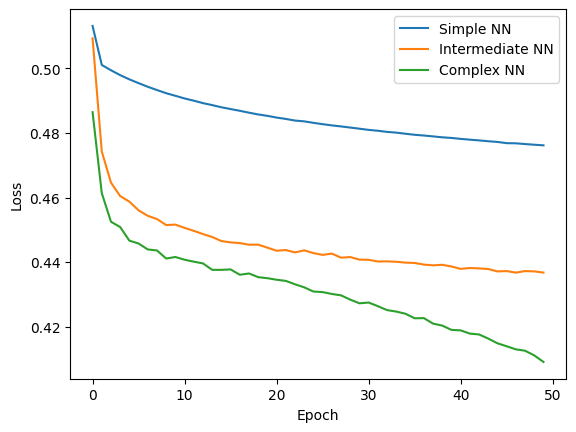

In [70]:
train_accuracy_simple = evaluate_model(simple_model, train_loader)
test_accuracy_simple = evaluate_model(simple_model, test_loader)

train_accuracy_intermediate = evaluate_model(intermediate_model, train_loader)
test_accuracy_intermediate = evaluate_model(intermediate_model, test_loader)

train_accuracy_complex = evaluate_model(complex_model, train_loader)
test_accuracy_complex = evaluate_model(complex_model, test_loader)

plt.plot(simple_train_losses, label='Simple NN')
plt.plot(intermediate_train_losses, label='Intermediate NN')
plt.plot(complex_train_losses, label='Complex NN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##7. Посчитайте метрики на train и test множествах:

In [73]:
print(f"Simple NN : Train Accuracy: {train_accuracy_simple}, Test Accuracy: {test_accuracy_simple}, Разница: {train_accuracy_simple - test_accuracy_simple}")
print(f"Intermediate NN : Train Accuracy: {train_accuracy_intermediate}, Test Accuracy: {test_accuracy_intermediate}, Разница: {train_accuracy_intermediate - test_accuracy_intermediate}")
print(f"Complex NN : Train Accuracy: {train_accuracy_complex}, Test Accuracy: {test_accuracy_complex}, Разница: {train_accuracy_intermediate - test_accuracy_intermediate}")

Simple NN : Train Accuracy: 0.7707164295967637, Test Accuracy: 0.7680062630480167, Разница: 0.002710166548747006
Intermediate NN : Train Accuracy: 0.7988385749706381, Test Accuracy: 0.787839248434238, Разница: 0.010999326536400122
Complex NN : Train Accuracy: 0.8101918308756362, Test Accuracy: 0.7917536534446764, Разница: 0.010999326536400122


##8. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:

1. Лучше остальных справилась Complex NN, тк наименьшая разница точности между train и test

2. Intermediate NN и Complex NN разница 1%, значит наблюдается небольшое переобучение.

3. Simple NN недообучена по сравнению с более сложными моделями.

4. Добавление регуляризации, подбор гиперпараметров